## Visualization file for ZeroShot and Mallet

In [3]:
import pandas as pd
import os
import numpy as np
from scipy.sparse import csr_matrix, vstack
import pyLDAvis as vis


In [4]:
def read_ZS(path_ZS):
    '''
    Returns a dictionary for the pyLDAvis module.
    Takes the path to the parent folder ZS_results (path_ZS)
    and searches the parameters inside ZS_output.
    '''
    input_path = os.path.join(path_ZS, 'ZS_output')
    
    if not os.path.exists(input_path):
        raise Exception('Path not found in PC!')

    else:
        search_items={
            'betas':['betas.npy','topic_term_dists'],
            'thetas':['thetas.npy', 'doc_topic_dists'],
            'doc_len':['doc_len.npy', 'doc_lengths'],
            'term_freq':['term_freq.npy', 'term_frequency']
        }
        results = {}

        for item in search_items:
            doc = np.load(os.path.join(input_path, search_items[item][0]))
            results.update({[search_itemsitem][1]:doc})


        vocab_path = os.path.join(input_path, 'vocab.txt')
        with open(vocab_path, 'r', encoding='utf-8') as f:
            vocab = [line.strip() for line in f.readlines()]

        results['vocab'] = vocab 

    return results

In [5]:
def read_mallet(path_mallet):
    '''
    Returns a dictionary for the pyLDAvis module.
    Takes the path to the parent folder mallet_folder (path_mallet)
    and searches the parameters inside mallet_output.
    '''
    input_path = os.path.join(path_mallet, 'mallet_output')
    
    if not os.path.exists(input_path):
        raise Exception('Path not found in PC!')

    else:
        search_items={
            'betas_en':['betas_EN.npy','topic_term_dists_en'],
            'betas_es':['betas_ES.npy','topic_term_dists_es'],
            'thetas_en':['thetas_EN.npz', 'doc_topic_dists_en'],
            'thetas_es':['thetas_ES.npz', 'doc_topic_dists_es'],
        }
        results = {}

        for item in search_items:
            doc = np.load(os.path.join(input_path, search_items[item][0]))
            results.update({search_items[item][1]:doc})

        #in order to get the doc-topic we have to transform back from -npz
        #to a matrix format, we do it in this lines
        aux = results['doc_topic_dists_en']
        #Reshaping of the auxiliar variable
        dense_vec_en = csr_matrix((aux['data'], aux['indices'], aux['indptr']), shape=aux['shape'])
        results['doc_topic_dists_en'] = dense_vec_en.toarray()

        #Reshaping of the auxiliar variable
        dense_vec_es = csr_matrix((aux['data'], aux['indices'], aux['indptr']), shape=aux['shape'])
        results['doc_topic_dists_es'] = dense_vec_es.toarray()

        doc_topic_matrix = vstack([dense_vec_en, dense_vec_es])

        # Convert to dense
        results['doc_topic_dists'] = doc_topic_matrix.toarray()

        #Get the vocab and frequency, both stored in vocab.txt
        vocab_path = os.path.join(input_path, 'vocab_EN.txt')
        vocab_df = pd.read_csv(vocab_path, sep='\t', header = None)
        results['vocab_en'] = vocab_df[0]
        results['term_frequency_en'] = vocab_df[1] 

        vocab_path = os.path.join(input_path, 'vocab_ES.txt')
        vocab_df = pd.read_csv(vocab_path, sep='\t', header = None)
        results['vocab_es'] = vocab_df[0]
        results['term_frequency_es'] = vocab_df[1] 

        #Error, estas simplemente sumando 1 en todos los topic_lengths
        results['doc_lengths_en'] = np.round(results['doc_topic_dists_en'].sum(axis=1)).astype(int)
        results['doc_lengths_es'] = np.round(results['doc_topic_dists_es'].sum(axis=1)).astype(int)
        print(np.round(results['doc_topic_dists_en'].sum(axis=1)).astype(int))
        results['doc_lengths'] = np.round(results['doc_topic_dists'].sum(axis=1)).astype(int)





    return results

In [6]:
vis_inputs = read_mallet('/export/usuarios_ml4ds/ammesa/mallet_folder')

visuals = vis.prepare(topic_term_dists=vis_inputs['topic_term_dists_en'],
                      doc_topic_dists=vis_inputs['doc_topic_dists_en'],
                      doc_lengths=vis_inputs['doc_lengths_en'],
                      vocab=vis_inputs['vocab_en'],
                      term_frequency=vis_inputs['term_frequency_en'])
vis.display(visuals)


[1 1 1 ... 1 1 1]


/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_vis/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_vis/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_vis/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_vis/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=461019) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_vis/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: Depre

In [7]:
vis.save_html(visuals, 'mallet_en.html')


In [8]:
visuals = vis.prepare(topic_term_dists=vis_inputs['topic_term_dists_es'],
                      doc_topic_dists=vis_inputs['doc_topic_dists_es'],
                      doc_lengths=vis_inputs['doc_lengths_es'],
                      vocab=vis_inputs['vocab_es'],
                      term_frequency=vis_inputs['term_frequency_es'])
vis.display(visuals)



/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_vis/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_vis/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/export/usuarios_ml4ds/ammesa/TFG-LLMs/.venv_vis/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [11]:
vis.save_html(visuals, 'mallet_es.html')


In [12]:
vis_inputs_zs = read_ZS('/export/usuarios_ml4ds/ammesa/ZS_results')
visuals = vis.prepare(topic_term_dists=vis_inputs_zs['topic_term_dists'],
                      doc_topic_dists=vis_inputs_zs['doc_topic_dists'],
                      doc_lengths=vis_inputs_zs['doc_lengths'],
                      vocab=vis_inputs_zs['vocab'],
                      term_frequency=vis_inputs_zs['term_frequency'])
vis.display(visuals)

In [ ]:
vis.save_html(visuals, 'ctm.html')



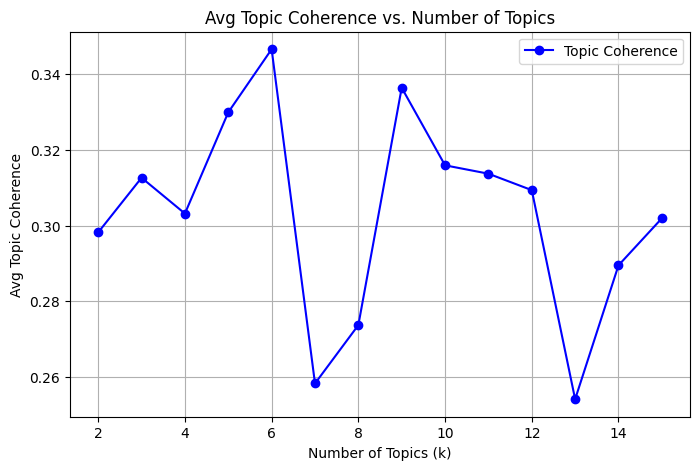

In [2]:
import matplotlib.pyplot as plt
import numpy as np

coh = [0.29820759,0.31264174,0.30317978,0.32993245,0.34660223,0.25827981,0.2737075,0.3364208, 0.31592277, 0.31371231, 0.30936839, 0.25412107, 0.28949794, 0.3019182 ]
n_topics = np.linspace(2,15,14, dtype = int)
# Plot
plt.figure(figsize=(8, 5))
plt.plot(n_topics, coh, marker='o', linestyle='-', color='b', label='Topic Coherence')
plt.xlabel('Number of Topics (k)')
plt.ylabel('Avg Topic Coherence')
plt.title('Avg Topic Coherence vs. Number of Topics')
plt.grid(True)
plt.legend()
plt.show()
